# Feature selection

In [14]:
import pandas as pd
import numpy as np
from selection import load_dataset, create_model, compute_r2, get_best_feature
import matplotlib.pyplot as plt

In [2]:
# Load dataset
D, pa, r = load_dataset('../../Feat_sel/final_25_days_60_prec_diff.csv')

In [3]:
# Create model
model = create_model(min_split=186, njobs=32)

In [4]:
_, r2_start = compute_r2(model, D, r)
r_pred_start, r2_portfolio_action = compute_r2(model, pa, r)
print("R2 full:", r2_start)
print("R2 portfolio-action:", r2_portfolio_action)

R2 full: 0.2790595662591546
R2 portfolio-action: 0.016103222179198795


In [19]:
# Init log structures
R2_log = [r2_portfolio_action]
selected_indexes = [0, 62] # Features ind Selected

In [20]:
R2 = 0
iteration = 0
while R2 > -1:
    print('Iteration:', iteration)
    y_pred, R2 = get_best_feature(model, D, r, selected_indexes, r_pred_start)
    R2_log.append(R2)
    print("R2:", R2)
    iteration += 1

Iteration: 0
R2: 0.023215327484324977
Iteration: 1
R2: 0.05334118096470197
Iteration: 2
R2: 0.08247428870801932
Iteration: 3
R2: 0.10547938386835842
Iteration: 4
R2: 0.11969010096592325
Iteration: 5
R2: 0.1360117649323639
Iteration: 6
R2: 0.14753670150130804
Iteration: 7
R2: 0.1589264592380587
Iteration: 8
R2: 0.16992647770105918
Iteration: 9
R2: 0.17695528078448153
Iteration: 10
R2: 0.1872133619211418
Iteration: 11
R2: 0.19311155070009645
Iteration: 12
R2: 0.19783432107006005
Iteration: 13
R2: 0.20516005852710784
Iteration: 14
R2: 0.20873284682542603
Iteration: 15
R2: 0.20288461773804556
Iteration: 16
R2: 0.20858805267666647
Iteration: 17
R2: 0.21190035412343444
Iteration: 18
R2: 0.21327850071323984
Iteration: 19
R2: 0.21780929888696499
Iteration: 20
R2: 0.2226019078987349
Iteration: 21
R2: 0.22721091324195908
Iteration: 22
R2: 0.23120316480570702
Iteration: 23
R2: 0.23264069343390392
Iteration: 24
R2: 0.2372608502635607
Iteration: 25
R2: 0.2392218829588626
Iteration: 26
R2: 0.2413027

KeyboardInterrupt: 

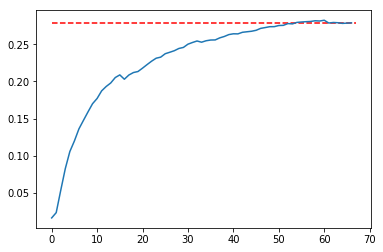

In [25]:
fig = plt.figure()
plt.plot([0, len(R2_log)], [r2_start, r2_start], 'r--')
plt.plot(R2_log)
plt.show();

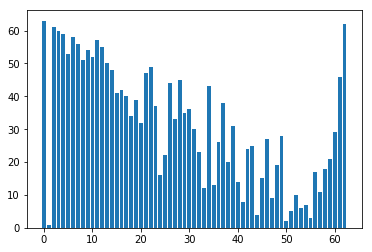

In [30]:
feat, order = zip(*[(v,len(selected_indexes)-i) for i, v in enumerate(selected_indexes)])
plt.bar(feat, order)
plt.show();